# Using Principal Component Analysis to Reduce the Dimensionality of a Dataset of Grain Sizes

The aim of this program is to employ Principal Component Analysis (PCA) on a simple dataset to reduce the dimensionality from two dimesnions to one. PCA identifies the directions of greatest variance in the data by computing the principal components, then performs a change of basis on the data by projecting it onto a limited number of these principal components. In this way the number of features in the data can be reduced whilst the variance in the remaining features is preserved. This is important for the performance of the Machine Learning model.

Start by reading the data into a Pandas data frame.

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# read data into data frame
df = pd.read_csv('grains.csv', header = None)
# add column names
col_names = ['width', 'length']
df.columns = col_names

It is always helpful to plot the data to help visualise the problem.

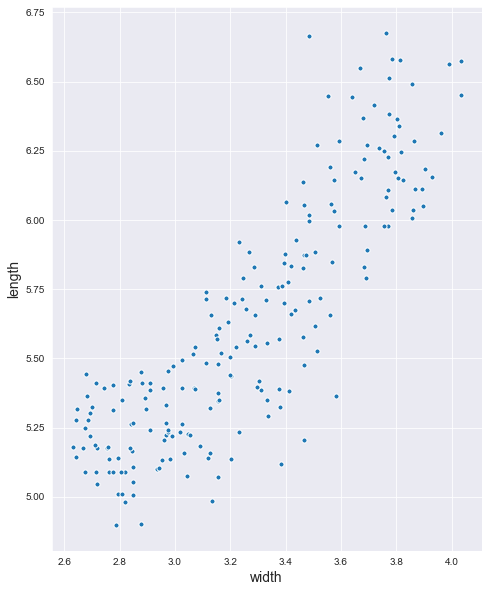

In [64]:
sns.set_style('darkgrid')
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)
ax.scatter(df['width'], df['length'], s = 26, edgecolors = 'white')
ax.set_xlabel('width', fontsize = 14)
ax.set_ylabel('length', fontsize = 14)
plt.axis('scaled')
plt.show()

When undertaking PCA it is important to carry out mean-normalisation on the features beforehand. This entails simply subtracting the mean of a feature over all samples from the feature value for each sample.

In [65]:
# assign feature to x1 and x2
x1, x2 = df['width'], df['length']
# mean normalise the features
x1_mean, x2_mean = np.mean(x1), np.mean(x2)
x1_norm = x1 - x1_mean
x2_norm = x2 - x2_mean
# generate the feature matrix X
X = np.stack((x1_norm, x2_norm), axis =1)

We start off with the covariance matrix $C_X$ defined by $C_X = \frac{1}{m}XX^T$, of the data $X$ which has $n$ features and $m$ samples.

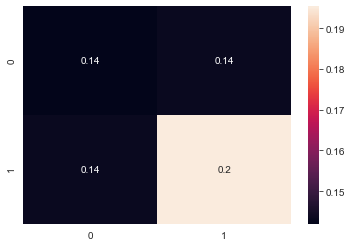

In [66]:
# m is the number of samples, n is the number of features
m, n = X.shape
# calculate the covariance matrix C_X
C_X = ((1/m)*np.dot(X.T, X))
# view C_X
fig = plt.figure()
ax = sns.heatmap(C_X, annot = True)

The goal of PCA is to reduce the dimensionality of the data, whilst also maximising variance and reducing redundancy in the remaining features. This corresponds to diagonalising the covariance matrix of $X$, as the diagonal elements represent variance (spread of data around the mean), and the off-diagonal elements represent feature redundancy (covariance - the correlational relationships between different features).

We want to project the data $X$ onto a lower-dimensionality space $Z$ in such a way that the covariance matrix $C_Z = \frac{1}{m}ZZ^T$ is diagonal. We do this by applying the transformation $Z = U^TX$, where $U$ has the dimensions $(n \times k)$, $k<n$. $X$ has dimensions $(n \times m)$, therefore $Z$ will have the dimensions  $(k \times n)\cdot(n \times m)=(k \times m)$, i.e., the features have been reduced from $n$ to $k$.

It can be shown that the $U$ that produces the diagonal covariance matrix $C_Z$ is composed of the orthonormal eigenvectors of $C_X$. Therefore, we proceed by finding the eigenvalues and eigenvectors of $C_X$.

In [67]:
# get the eigenvalues and eigenvectors of the covariance matrix
eigenvals, eigenvecs = np.linalg.eig(C_X)

# identify the primary components
# the column v[:,i] is the eigenvector corresponding to the eigenvalue w[i]
# the primary component is the eigenvector corresponding to the largest eigenvalue
first_component = -1*eigenvecs[:,1]
second_component = -1*eigenvecs[:,0]
# check that these two eigenvectors are orthonormal
print('Eigenvalues:')
print(eigenvals)
print('\n')
print('Eigenvectors:')
print(eigenvecs)
print('\n')
print('The dot product of the two primary components is equal to {}'.format(np.inner(first_component, second_component)))
print('The magnitude of the eigenvectors is {:.1f} and {:.1f}'. format(np.sqrt(first_component[0]**2 + first_component[1]**2),
                                                                    np.sqrt(second_component[0]**2 + second_component[1]**2)))

Eigenvalues:
[0.02290921 0.31445008]


Eigenvectors:
[[-0.76912343 -0.63910027]
 [ 0.63910027 -0.76912343]]


The dot product of the two primary components is equal to 0.0
The magnitude of the eigenvectors is 1.0 and 1.0


It can be shown that the eigenvectors of $C_X$ (known as the principal components) lie along the lines of maximum variance in $X$, with the eigenvalues equal to the variance. The eigenvector with the largest corresponding eigenvalue points in the direction of maximum variance. The eigenvector with the next largest corresponding eigenvalue points in the direction of the second largest variance, and so on. We demonstrate this in the next plot.

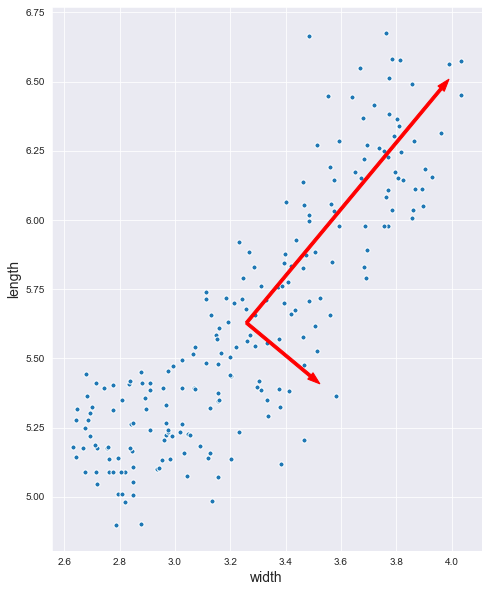

In [68]:
# plot data
fig2 = plt.figure(figsize = (10, 10))
ax2 = fig2.add_subplot(111)
ax2.scatter(df['width'], df['length'], s = 26, edgecolors = 'white')
ax2.set_xlabel('width', fontsize = 14)
ax2.set_ylabel('length', fontsize = 14)

# plot eigenvectors from the mean of the data points
ax2.arrow(x1_mean, x2_mean, 1.1*first_component[0], 1.1*first_component[1], color = 'r', width = 0.01)
ax2.arrow(x1_mean, x2_mean, 0.3*second_component[0], 0.3*second_component[1], color = 'r', width = 0.01)
plt.axis('scaled')
plt.show()

Intuitively this plot makes sense, as we can see how the vector direction that will minimise the projection error of the dataset is along the line of maximum variance. Therefore, it should be no surprise that $U$ is composed of the eigenvectors of $C_X$.

We project the two-dimensional data onto one-dimensional space with $Z = U^TX$, where in this case $U$ is composed of the primary component only (the eigenvector of $C_X$ withe the largest corresponding eigenvalue).

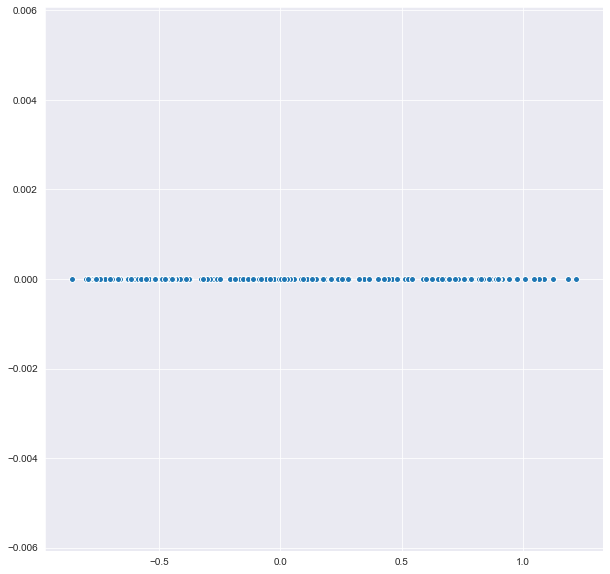

In [69]:
# project data onto 1 dimension using the 'first_component' eigenvector
Z = np.dot(X, first_component)
# plot projected data
# there needs to be 2D data to use 2D plotting functions so create an array of zeros to plot the projected data along the x axis
zeros = np.zeros(Z.shape[0],)

# generate plot
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)
ax.scatter(Z, zeros, edgecolor = 'white')
plt.show()